# Obtain Ensembl canonical transcripts corresponding to the 65 CH genes

### 1st. Get canonical transcript codes corresponding to the 65 CH genes

#### CH gene list
"IntOGen-DriverGenes-CH.tsv" - Obtained from www.intogen.org/ch/ (2021-02-24)

#### Gene annotations (Canonical transcripts, Ensembl v101)

Data from cluster (Claudia): "/workspace/projects/genomic_regions/raw_data/ensembl/release_101"

Saved in: "/home/sdemajo/CH_UKBiobank_2021_03/data/hg38_ensembl_canonical_transcripts.tsv"

### 2nd. Get genomic coordinates from BioMart using the ENST codes

BioMart data version: Ensembl Genes 103 & GRCh38.p13

Download from website and saved in "/home/sdemajo/CH_UKBiobank_2021_03/results/CH_genes_canonical_transcripts_coordinates.tsv"


### 3rd. Open results and explore data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## READ DATA

In [3]:
### CH driver genes

ch_genes_df = pd.read_csv("/home/sdemajo/CH_UKBiobank_2021_03/data/IntOGen-DriverGenes-CH.tsv", sep="\t")
ch_genes_df

,Symbol,Mutations,Samples,Samples (%),Cohorts
0,DNMT3A,"3,343","3,005",15.64,3
1,TET2,"1,011",925,4.81,3
2,PPM1D,776,683,3.56,3
3,ASXL1,438,433,2.25,3
4,ATM,352,337,1.75,3
...,...,...,...,...,...
60,KDM5C,109,7,0.04,1
61,MYO5A,96,7,0.04,1
62,ERF,27,6,0.03,1
63,CUX1,76,5,0.03,1


In [8]:
### Canonical transcripts

ctranscripts = pd.read_csv("/home/sdemajo/CH_UKBiobank_2021_03/data/hg38_ensembl_canonical_transcripts.tsv",
                           sep="\t", header=None)
ctranscripts

,0,1,2
0,ENSG00000198888,ENST00000361390,MT-ND1
1,ENSG00000198763,ENST00000361453,MT-ND2
2,ENSG00000198804,ENST00000361624,MT-CO1
3,ENSG00000198712,ENST00000361739,MT-CO2
4,ENSG00000228253,ENST00000361851,MT-ATP8
...,...,...,...
21845,ENSG00000284901,ENST00000643444,RUVBL1
21846,ENSG00000284869,ENST00000644579,EEFSEC
21847,ENSG00000284933,ENST00000642803,ARHGEF5
21848,ENSG00000285328,ENST00000643277,NOBOX


## GET CANONICAL TRANSCRIPTS CH GENES

In [23]:
### Obtain list of CH genes

ch_genes = ch_genes_df["Symbol"]
ch_genes

0     DNMT3A
1       TET2
2      PPM1D
3      ASXL1
4        ATM
       ...  
60     KDM5C
61     MYO5A
62       ERF
63      CUX1
64    CDKN1B
Name: Symbol, Length: 65, dtype: object

In [24]:
### Obtain canonical transcripts from 65 genes

ch_genes_ctranscripts = ctranscripts[ctranscripts[2].isin(ch_genes)]
ch_genes_ctranscripts

,0,1,2
522,ENSG00000143322,ENST00000502732,ABL2
664,ENSG00000198625,ENST00000367182,MDM4
1129,ENSG00000165731,ENST00000355710,RET
1608,ENSG00000107669,ENST00000224652,ATE1
2278,ENSG00000167985,ENST00000301761,SDHAF2
...,...,...,...
20223,ENSG00000169083,ENST00000374690,AR
20494,ENSG00000101972,ENST00000371145,STAG2
20799,ENSG00000213281,ENST00000369535,NRAS
21392,ENSG00000117400,ENST00000372470,MPL


In [50]:
# Check number of genes obtained
print(len(ch_genes_ctranscripts[2]))
print()
print(len(ch_genes_ctranscripts[2].unique()))
print()

# Check missing genes
print(ch_genes[-ch_genes.isin(ch_genes_ctranscripts[2])])

66

65

48    MKL1
dtype: object


In [49]:
# Check duplicated gene
print(ch_genes_ctranscripts[2].value_counts())
print()

print(ch_genes_ctranscripts[ch_genes_ctranscripts[2] == "PTPRD"])
print()

PTPRD     2
MGA       1
LZTR1     1
TP63      1
SH2B3     1
         ..
CBL       1
ERF       1
DNMT3B    1
ASXL1     1
IDH1      1
Name: 2, Length: 65, dtype: int64

                     0                1      2
16719  ENSG00000153707  ENST00000381196  PTPRD
18212  ENSG00000282932  ENST00000634556  PTPRD



**NOTE:
ENSG00000153707 is the "PTPRD (Human Gene)" and ENSG00000282932 "PTPRD (Human Alternative sequence Gene)" according to Ensembl website**


Eliminate ENSG00000282932, which is located in "CHR_HSCHR9_1_CTG6" chromosome

In [55]:
# Obtain genes again with MKL1 (=MRTFA)
ch_genes = ch_genes.append(pd.Series("MRTFA"))
ch_genes_ctranscripts = ctranscripts[ctranscripts[2].isin(ch_genes)]

ch_genes_ctranscripts

,0,1,2
522,ENSG00000143322,ENST00000502732,ABL2
664,ENSG00000198625,ENST00000367182,MDM4
1129,ENSG00000165731,ENST00000355710,RET
1608,ENSG00000107669,ENST00000224652,ATE1
2278,ENSG00000167985,ENST00000301761,SDHAF2
...,...,...,...
20223,ENSG00000169083,ENST00000374690,AR
20494,ENSG00000101972,ENST00000371145,STAG2
20799,ENSG00000213281,ENST00000369535,NRAS
21392,ENSG00000117400,ENST00000372470,MPL


In [56]:
# Check number of genes obtained
print(len(ch_genes_ctranscripts[2]))
print()
print(len(ch_genes_ctranscripts[2].unique()))
print()

# Eliminate strange PTPRD
ch_genes_ctranscripts = ch_genes_ctranscripts[ch_genes_ctranscripts[0] != "ENSG00000282932"]

# Check number of genes obtained
print(len(ch_genes_ctranscripts[2]))
print()
print(len(ch_genes_ctranscripts[2].unique()))
print()

66

65

65

65



## SAVE RESULTS

In [62]:
ch_genes_ctranscripts

,0,1,2
522,ENSG00000143322,ENST00000502732,ABL2
664,ENSG00000198625,ENST00000367182,MDM4
1129,ENSG00000165731,ENST00000355710,RET
1608,ENSG00000107669,ENST00000224652,ATE1
2278,ENSG00000167985,ENST00000301761,SDHAF2
...,...,...,...
20223,ENSG00000169083,ENST00000374690,AR
20494,ENSG00000101972,ENST00000371145,STAG2
20799,ENSG00000213281,ENST00000369535,NRAS
21392,ENSG00000117400,ENST00000372470,MPL


In [60]:
ch_genes_ctranscripts[1]

522      ENST00000502732
664      ENST00000367182
1129     ENST00000355710
1608     ENST00000224652
2278     ENST00000301761
              ...       
20223    ENST00000374690
20494    ENST00000371145
20799    ENST00000369535
21392    ENST00000372470
21690    ENST00000378609
Name: 1, Length: 65, dtype: object

In [63]:
ch_genes_ctranscripts.to_csv("/home/sdemajo/CH_UKBiobank_2021_03/results/CH_genes_canonical_transcripts.tsv",
                             sep="\t", header = None, index = False)

ch_genes_ctranscripts[1].to_csv("/home/sdemajo/CH_UKBiobank_2021_03/results/CH_genes_canonical_transcripts_ENST.tsv",
                             sep="\t", header = None, index = False)

## EXPLORE BIOMART OUTPUT

In [4]:
### Open CH canonical transcript coordinates (BioMart output)

ch_ctrans_coord = pd.read_csv("/home/sdemajo/CH_UKBiobank_2021_03/results/CH_genes_canonical_transcripts_coordinates.tsv",
                              sep="\t")
ch_ctrans_coord

,Gene stable ID,Gene stable ID version,Transcript stable ID,Transcript stable ID version,Protein stable ID,Protein stable ID version,Chromosome/scaffold name,Gene start (bp),Gene end (bp),Transcript start (bp),Transcript end (bp),Transcription start site (TSS),Transcript length (including UTRs and CDS),CDS Length,Strand,Gene name
0,ENSG00000099949,ENSG00000099949.21,ENST00000646124,ENST00000646124.2,ENSP00000496779,ENSP00000496779.1,22,20982269,20999032,20982297,20999032,20982297,4282,2523,1,LZTR1
1,ENSG00000159216,ENSG00000159216.19,ENST00000300305,ENST00000300305.7,ENSP00000300305,ENSP00000300305.3,21,34787801,36004667,34787801,35049344,35049344,6222,1443,-1,RUNX1
2,ENSG00000096968,ENSG00000096968.14,ENST00000381652,ENST00000381652.4,ENSP00000371067,ENSP00000371067.4,9,4984390,5129948,4985272,5129948,4985272,7023,3399,1,JAK2
3,ENSG00000169249,ENSG00000169249.13,ENST00000307771,ENST00000307771.8,ENSP00000303015,ENSP00000303015.7,X,15790472,15823260,15790484,15823260,15790484,1479,1449,1,ZRSR2
4,ENSG00000153707,ENSG00000153707.17,ENST00000381196,ENST00000381196.8,ENSP00000370593,ENSP00000370593.3,9,8314246,10612723,8314246,10033790,10033790,9911,5739,-1,PTPRD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,ENSG00000073282,ENSG00000073282.14,ENST00000264731,ENST00000264731.8,ENSP00000264731,ENSP00000264731.3,3,189631389,189897276,189631389,189897276,189631389,4944,2043,1,TP63
61,ENSG00000161547,ENSG00000161547.17,ENST00000392485,ENST00000392485.2,ENSP00000376276,ENSP00000376276.2,17,76734115,76737333,76734115,76737333,76737333,2885,666,-1,SRSF2
62,ENSG00000138413,ENSG00000138413.14,ENST00000415913,ENST00000415913.5,ENSP00000390265,ENSP00000390265.1,2,208236229,208266074,208236265,208254322,208254322,2441,1245,-1,IDH1
63,ENSG00000143322,ENSG00000143322.21,ENST00000502732,ENST00000502732.6,ENSP00000427562,ENSP00000427562.1,1,179099330,179229684,179099330,179229677,179229677,12217,3549,-1,ABL2


In [5]:
# Difference gene/transcript start
print((ch_ctrans_coord["Gene start (bp)"] - ch_ctrans_coord["Transcript start (bp)"]).tolist())
print()

# Difference transcript start / TSS
print((ch_ctrans_coord["Transcript start (bp)"] - ch_ctrans_coord["Transcription start site (TSS)"]).tolist())
print()

# Difference gene/transcript end
print((ch_ctrans_coord["Gene end (bp)"] - ch_ctrans_coord["Transcript end (bp)"]).tolist())
print()

[-28, 0, -882, -12, 0, -20, -1, 0, 0, 0, -64104, 0, -5, 0, -1, -8, -837, 0, 0, -39188, -183, -12998, -6642, -31, -2310, -1494, 0, 0, -17100, 0, -30387, -82, -50, 0, 0, 0, 0, -418, 0, 0, -107, -7, -5702, 0, 0, -18, 0, 0, 0, 0, 0, 0, -3, 0, 0, -10, 0, -41, -761, -1269, 0, 0, -36, 0, -27]

[0, -261543, 0, 0, -1719544, -54075, 0, 0, -14614, 0, 0, 0, 0, -114735, -105801, -123538, -33049, 0, 0, 0, 0, 0, -19069, 0, 0, 0, -221767, -45683, -19172, 0, 0, 0, 0, 0, -28842, -41816, -51615, 0, -17483, 0, 0, -629274, -555007, 0, 0, -187598, -77214, -75118, -7559, -20736, -19423, -76908, -301078, 0, -12302, 0, 0, 0, 0, -45244, 0, -3218, -18057, -130347, 0]

[0, 955323, 0, 0, 578933, 584, 0, 0, 0, 177, 0, 3, 0, 0, 30, 102892, 215, 0, 1585, 3138, 0, 0, 48, 0, 0, 320008, 0, 7, 721, 3, 0, 0, 4441, 0, 0, 0, 0, 0, 0, 0, 25725, 0, 86300, 0, 1, 452, 316, 98, 0, 345, 9, 30, 638, 3, 0, 0, 0, 5777, 5154, 51, 0, 0, 11752, 7, 0]



[16763, 1216866, 145558, 32788, 2298477, 54679, 80989, 46971, 14614, 239591, 146988, 6457, 53287, 114735, 105832, 226438, 34101, 186598, 115409, 151857, 4544, 71474, 25759, 5911, 7311, 462452, 221767, 45690, 36993, 178334, 138741, 16691, 287189, 64031, 28842, 41816, 51615, 133941, 17483, 16648, 468054, 629281, 647009, 374513, 76710, 188068, 77530, 75216, 7559, 21081, 19432, 76938, 301719, 146270, 12302, 66097, 45700, 107628, 91567, 46564, 265887, 3218, 29845, 130354, 41741]

[16735, 261543, 144676, 32776, 1719544, 54075, 80988, 46971, 14614, 239414, 82884, 6454, 53282, 114735, 105801, 123538, 33049, 186598, 113824, 109531, 4361, 58476, 19069, 5880, 5001, 140950, 221767, 45683, 19172, 178331, 108354, 16609, 282698, 64031, 28842, 41816, 51615, 133523, 17483, 16648, 442222, 629274, 555007, 374513, 76709, 187598, 77214, 75118, 7559, 20736, 19423, 76908, 301078, 146267, 12302, 66087, 45700, 101810, 85652, 45244, 265887, 3218, 18057, 130347, 41714]

[28, 955323, 882, 12, 578933, 604, 1, 0, 0

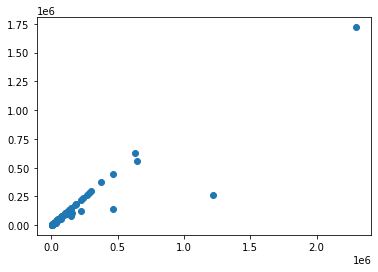

In [6]:
# Gene length
gene_length = ch_ctrans_coord["Gene end (bp)"] - ch_ctrans_coord["Gene start (bp)"]
print(gene_length.tolist())
print()

# Transcript length
transcript_length = ch_ctrans_coord["Transcript end (bp)"] - ch_ctrans_coord["Transcript start (bp)"]
print(transcript_length.tolist())
print()

# Difference
print((gene_length - transcript_length).tolist())

plt.scatter(gene_length, transcript_length)

------------------

**CONCLUSION: Take Gene (not Transcript) coordinates, which are wider**

------------------